# Demo: se_root and et_look parameters

This notebook shows a demonstration to run se_root and et_look models with customized parameters. In order to run this notebook, the netcdf file se_root_in.nc for Wad Helal (first 2 days of March 2023) is required. This is the input dataset for pywapor model, created after downloading data is finished.

First, import the packages pywapor and xarray:

In [1]:
import pywapor
import xarray as xr

# se_root parameters

To read the input dataset, change the value of se_root_in_path. For example, below the se_root_in.nc file is located in folder Test_case:

In [2]:
se_root_in_path = r'Test_case/se_root_in.nc'

This code below will show you information about dataset. Click on **Data variables** and explore the variables in the dataset. 

The variables without 0 dimension (i.e., shown as () ) are constants.

In [3]:
se_root_in = xr.open_dataset(se_root_in_path)
se_root_in

<xarray.Dataset>
Dimensions:              (time: 2, y: 452, x: 759)
Coordinates:
  * time                 (time) datetime64[ns] 2023-03-01T11:00:00 2023-03-02...
  * y                    (y) float64 14.35 14.35 14.35 ... 14.27 14.27 14.27
  * x                    (x) float64 33.15 33.15 33.15 ... 33.29 33.29 33.29
Data variables: (12/67)
    spatial_ref          int64 ...
    ndvi                 (time, y, x) float64 ...
    p_air_i              (time, y, x) float64 ...
    p_air_0_i            (time, y, x) float64 ...
    qv_i                 (time, y, x) float64 ...
    t_air_i              (time, y, x) float64 ...
    ...                   ...
    rn_offset            float64 ...
    vpd_slope            float64 ...
    t_amp_year           int64 ...
    r0_bare              float64 ...
    r0_full              float64 ...
    lst                  (time, y, x) float64 ...

To check the value of parameters, you can print se_root_in.[variable].values. For example, the code below prints out the value of r0_bare:

In [4]:
se_root_in.r0_bare.values

array(0.38)

To run se_root model for this dataset, we use this code:

In [5]:
se_root_out = pywapor.se_root.main(se_root_in)

> SE_ROOT
    --> Running `se_root` (v2).
        --> Calculating `seasonal_correction`.
        --> Calculating `declination`.
        --> Calculating `day_angle`.
        --> Calculating `air_pressure_kpa2mbar`.
        --> Calculating `air_pressure_kpa2mbar`.
        --> Calculating `vegetation_cover`.
        --> Calculating `air_temperature_kelvin_inst`.
        --> Calculating `air_temperature_kelvin`.
        --> Calculating `vapour_pressure_from_specific_humidity_inst`.
        --> Calculating `vapour_pressure_from_specific_humidity`.
        --> Calculating `specific_humidity_from_vapour_pressure`.
        --> Calculating `moist_air_density_inst`.
        --> Calculating `moist_air_density`.
        --> Calculating `dry_air_density_inst`.
        --> Calculating `dry_air_density`.
        --> Calculating `air_density_inst`.
        --> Calculating `air_density`.
        --> Calculating `wind_speed_blending_height_bare`.
        --> Calculating `longitude_rad`.
        --> Calc

# Run se_root with customized parameters

You can assign a new value to the parameter. For example, the code below change value of r0_bare to 0.32

In [6]:
se_root_in["r0_bare"] = 0.32

After assigning new parameter values, we can run the model again with this new parameter. We will assign output to a new variable called se_root_out2:

In [7]:
se_root_out2 = pywapor.se_root.main(se_root_in)

> SE_ROOT
    --> Running `se_root` (v2).
        --> Calculating `seasonal_correction`.
        --> Calculating `declination`.
        --> Calculating `day_angle`.
        --> Calculating `air_pressure_kpa2mbar`.
        --> Calculating `air_pressure_kpa2mbar`.
        --> Calculating `vegetation_cover`.
        --> Calculating `air_temperature_kelvin_inst`.
        --> Calculating `air_temperature_kelvin`.
        --> Calculating `vapour_pressure_from_specific_humidity_inst`.
        --> Calculating `vapour_pressure_from_specific_humidity`.
        --> Calculating `specific_humidity_from_vapour_pressure`.
        --> Calculating `moist_air_density_inst`.
        --> Calculating `moist_air_density`.
        --> Calculating `dry_air_density_inst`.
        --> Calculating `dry_air_density`.
        --> Calculating `air_density_inst`.
        --> Calculating `air_density`.
        --> Calculating `wind_speed_blending_height_bare`.
        --> Calculating `longitude_rad`.
        --> Calc

Now, let's compare the output before and after changing r0_bare value. This code below calculates the difference between the rootzone soil moisture output with r0_bare  = 0.38 and with r0_bare = 0.32

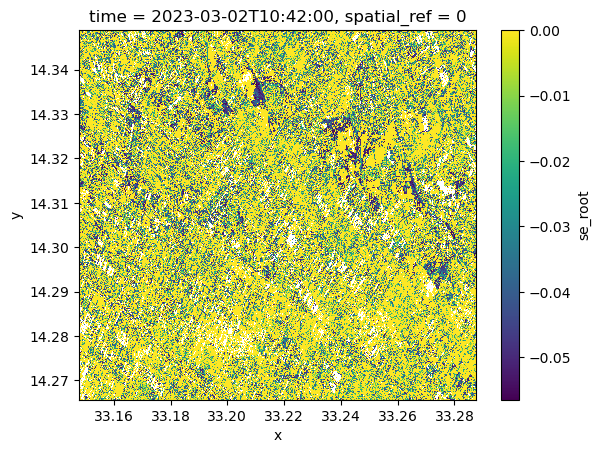

In [8]:
diff= se_root_out.se_root[1]- se_root_out2.se_root[1]
diff.plot()

❓ **Question**: Do you find the difference in rootzone soil moisture between the two runs? Where do you find the largest difference?

# et_look parameters

To read the input dataset, change the value of se_root_in_path. For example, below the se_root_in.nc file is located in folder Test_case:

In [9]:
et_look_in_path = r'Test_case/et_look_in.nc'

This code below will show you information about dataset. Click on **Data variables** and explore the variables in the dataset. 

The variables without 0 dimension (i.e., shown as **()** ) are constants. 

The variables with 2 dimensions (i.e., shown as **(y,x)** ) are STATICS:

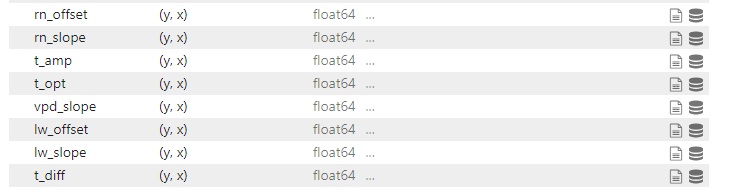

In [10]:
et_look_in = xr.open_dataset(et_look_in_path)
et_look_in

<xarray.Dataset>
Dimensions:              (time_bins: 2, y: 452, x: 759)
Coordinates:
  * time_bins            (time_bins) datetime64[ns] 2023-03-01 2023-03-02
  * y                    (y) float64 14.35 14.35 14.35 ... 14.27 14.27 14.27
  * x                    (x) float64 33.15 33.15 33.15 ... 33.29 33.29 33.29
Data variables: (12/75)
    spatial_ref          int64 ...
    ndvi                 (time_bins, y, x) float64 ...
    r0                   (time_bins, y, x) float64 ...
    se_root              (time_bins, y, x) float64 ...
    p_24                 (time_bins, y, x) float64 ...
    z                    (y, x) float64 ...
    ...                   ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...
    t_amp_year           int64 ...
    r0_bare              float64 ...
    r0_full              float64 ...

To check the value of 2-dimension parameters, you can print et_look_in.[variable].plot(). For example, the code below prints out the value of t_opt (Optimum air temperature for plant growth):

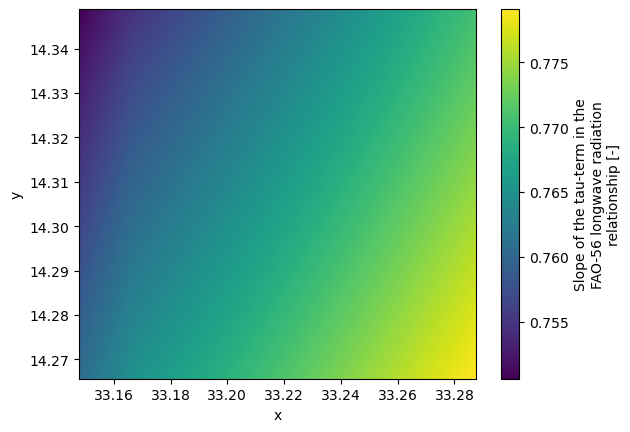

In [11]:
et_look_in.lw_slope.plot()

To run et_look model for this dataset, we use this code:

In [12]:
et_look_out = pywapor.et_look.main(et_look_in,et_look_version="v3",export_vars='all')

> ET_LOOK
    --> Running `et_look` (v3).
    --> Setting `rs_min` to `100`.
    --> Setting `land_mask` to `1`.
    --> Setting `z_obst_max` to `3`.
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure_minimum`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `saturated_v

# Run et_look with customized parameters

In the lecture, you have learned that nd_max parameters can have huge impact on Leaf Area Index (LAI):

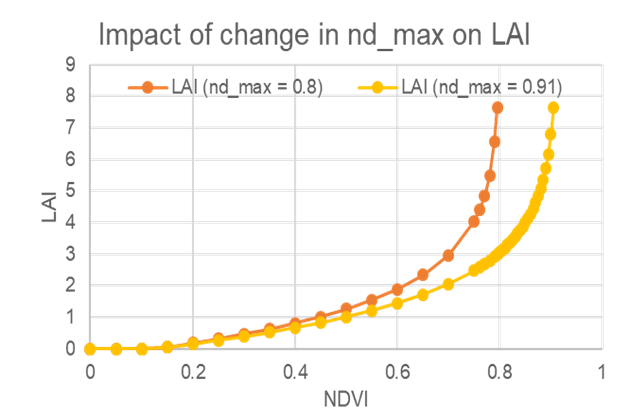

In turns, LAI has impact on the calculation of interception and transpiration, . Let's try to compare et_look model output when changing nd_max

In [13]:
# default nd_max value
et_look_in["nd_max"].values 

array(0.8)

In [14]:
import numpy as np
# customize nd_max value
et_look_in["nd_max"] =  0.91

In [15]:
et_look_out2 = pywapor.et_look.main(et_look_in,et_look_version="v3",export_vars='all')

> ET_LOOK
    --> Running `et_look` (v3).
    --> Setting `rs_min` to `100`.
    --> Setting `land_mask` to `1`.
    --> Setting `z_obst_max` to `3`.
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure_minimum`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `saturated_v

Now, let's compare the output before and after changing nd_max value. 

In [16]:
# calculate the difference between et_look outputs
diff= et_look_out- et_look_out2
diff

<xarray.Dataset>
Dimensions:              (time_bins: 2, y: 452, x: 759)
Coordinates:
    spatial_ref          int32 0
  * time_bins            (time_bins) datetime64[ns] 2023-03-01 2023-03-02
  * y                    (y) float64 14.35 14.35 14.35 ... 14.27 14.27 14.27
  * x                    (x) float64 33.15 33.15 33.15 ... 33.29 33.29 33.29
Data variables: (12/155)
    ndvi                 (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    r0                   (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    se_root              (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    p_24                 (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    z                    (y, x) float64 dask.array<chunksize=(452, 500), meta=np.ndarray>
    ra_24                (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    ...                   ...
    co2_fert             (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    f_par                (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    a_d                  (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    co2_act              (time_bins) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    svp_24_min           (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>
    svp_24_max           (time_bins, y, x) float64 dask.array<chunksize=(2, 452, 500), meta=np.ndarray>

**Impact on evapotranspiration**

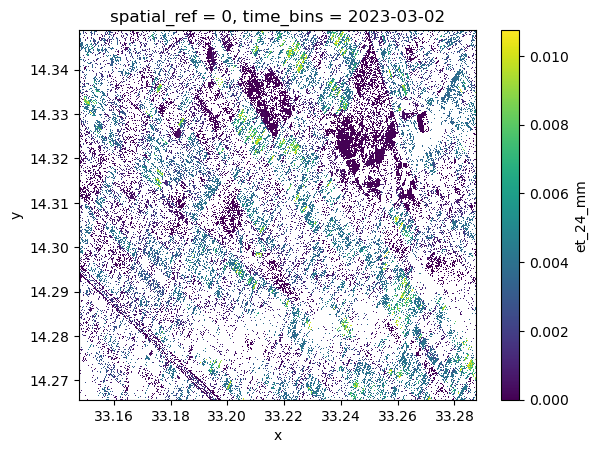

In [17]:
diff.et_24_mm[1].plot()

**Impact on transpiration**

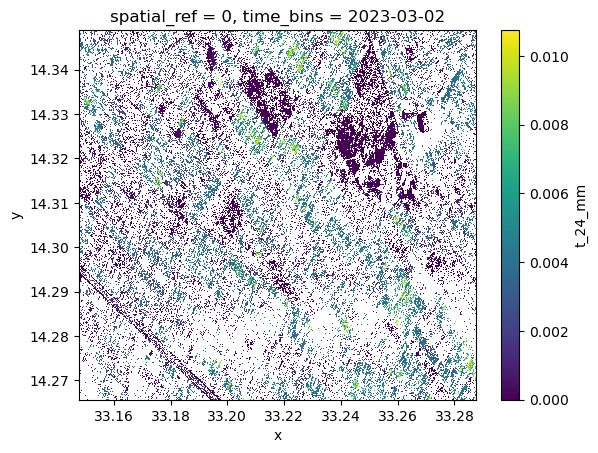

In [18]:
diff.t_24_mm[1].plot()

**Impact on interception**

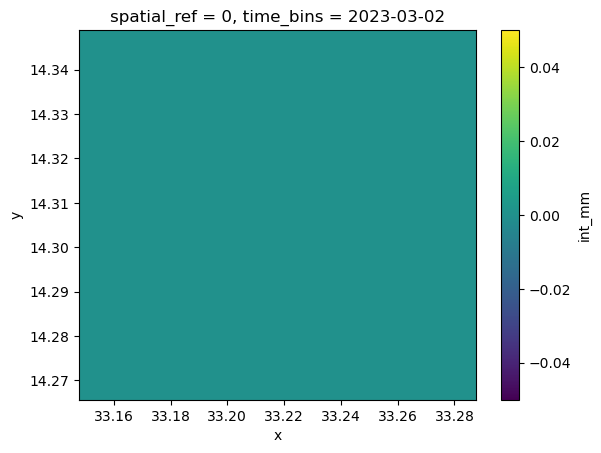

In [20]:
diff.int_mm[1].plot()

❓ Why LAI change impact only transpiration, and not interception in this case?

**Hint**: Interception also depends on precipitation

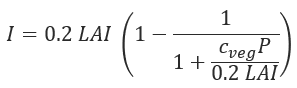

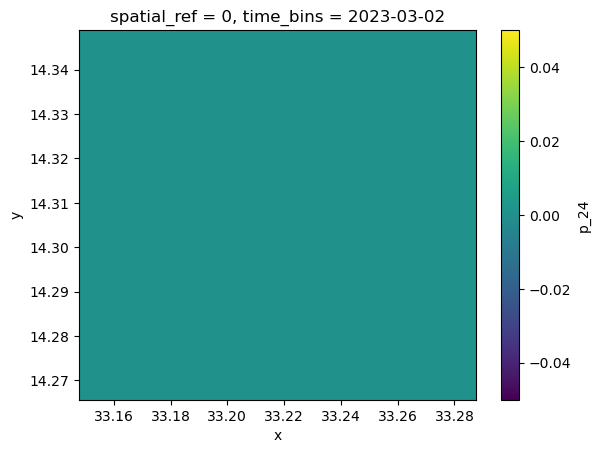

In [21]:
diff.p_24[1].plot()